Ноутбук написан для Python 3

Для обеспечения обратной совместимости библиотеки matplotlib используется параметр normed

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
%matplotlib inline

Распределение Ломакса

- https://en.wikipedia.org/wiki/Lomax_distribution

- https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.lomax.html#scipy.stats.lomax

Примеры распеределений с разными значениями параметра $c$:

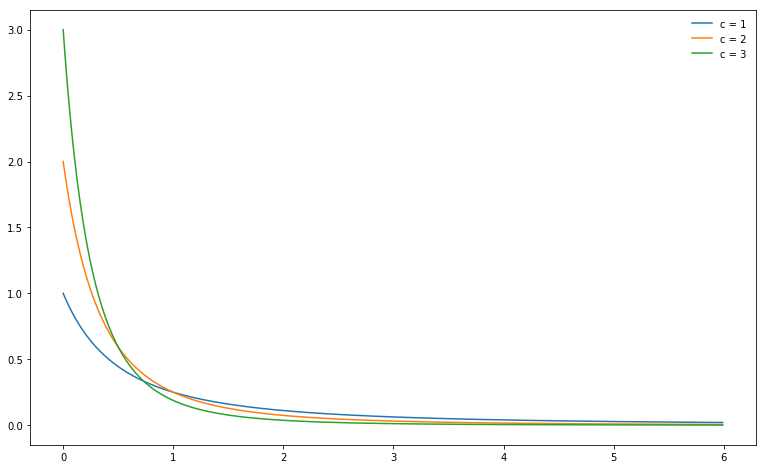

In [2]:
x = np.arange(0, 6, 0.01)

plt.figure(figsize=[13, 8])

lom_rv = sts.lomax(1, scale=1)
plt.plot(x, lom_rv.pdf(x), label='c = 1')

lom_rv = sts.lomax(2)
plt.plot(x, lom_rv.pdf(x), label='c = 2')

lom_rv = sts.lomax(3)
plt.plot(x, lom_rv.pdf(x), label='c = 3')

plt.legend(frameon=False)
plt.show()

 Формула плотности распределения из Википедии:
 
 $$p(x) = \frac {\alpha \lambda^\alpha} {(1 + x)^{\alpha+1}}$$
 
 Формула из документации scipy:
 
 $$p(x) = \frac {c} {(1 + x)^{\\c+1}}$$
 
- $\lambda = scale$ (именованный параметр scale, по умолчанию равен 1)
- $\alpha = c$

In [3]:
c = 10

In [4]:
lom_rv = sts.lomax(c)

Создадим выборку размера $1000$:

In [5]:
lom_rvs = lom_rv.rvs(1000)

Построим гисторграмму выборки и график теоретической плотности распределения:

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


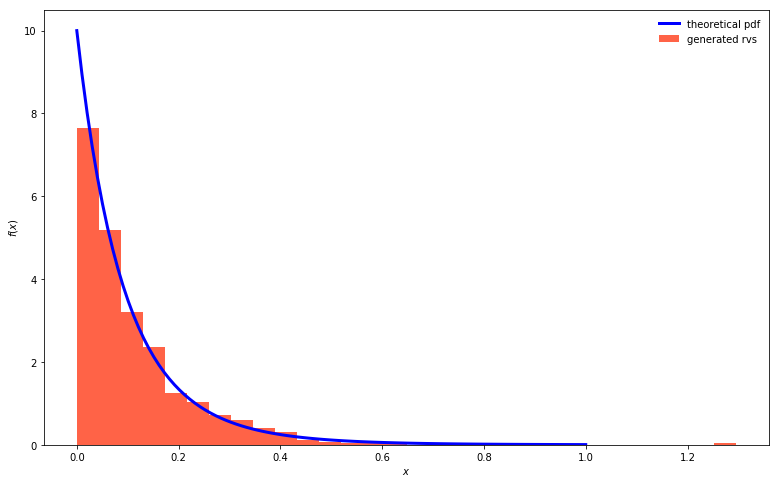

In [6]:
plt.figure(figsize=[13, 8])

plt.hist(lom_rvs, bins=30, normed=True, label='generated rvs', color='tomato')

t = np.linspace(0, 1, 100)
pdf = lom_rv.pdf(t)
plt.plot(t, pdf, label='theoretical pdf', linewidth=3, color='blue')

plt.legend(frameon=False)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Посчитаем математическое ожидание распределения Ломакса по формуле из Википедии ($\alpha > 1$):

$$Mean = \frac {\lambda} {\alpha - 1}$$

In [7]:
mean = 1 / (c - 1)
mean

0.1111111111111111

Найдем матожидание средствами библиотеки scipy

In [8]:
lom_rv.mean()

0.11111111111111116

Посчитаем дисперсию распределения Ломакса по формуле из Википедии ($\alpha > 2$):

$$Variance = \frac {\lambda^2 \alpha} {(\alpha - 1)^2 (\alpha - 2)}$$

In [9]:
var = c / ((c - 1)**2 * (c - 2))
var

0.015432098765432098

Найдем дисперсию средствами библиотеки scipy

In [11]:
lom_rv.var()

0.015432098765432098

Оценим распределение выборочного среднего случайной величины при разных объёмах выборок

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


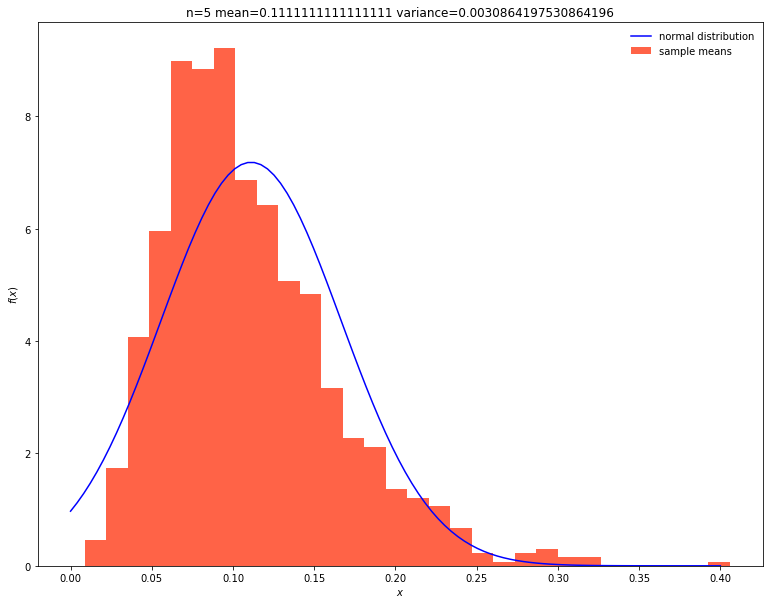

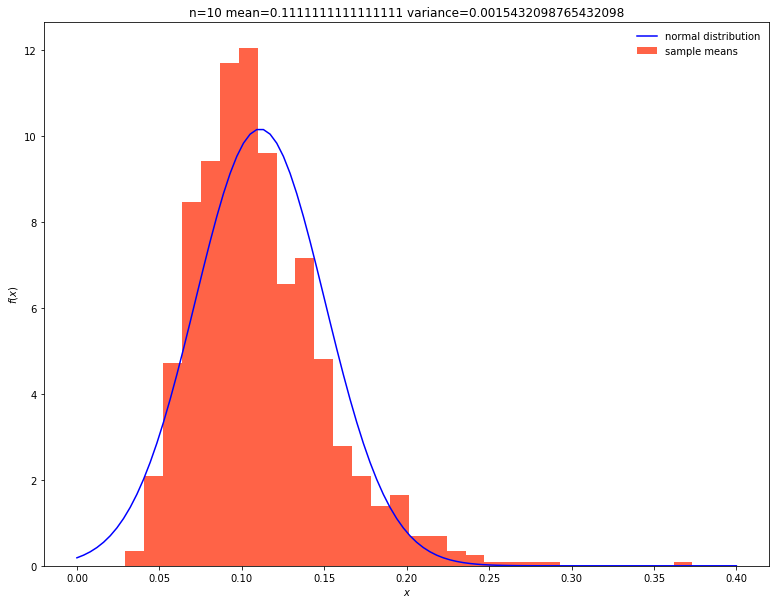

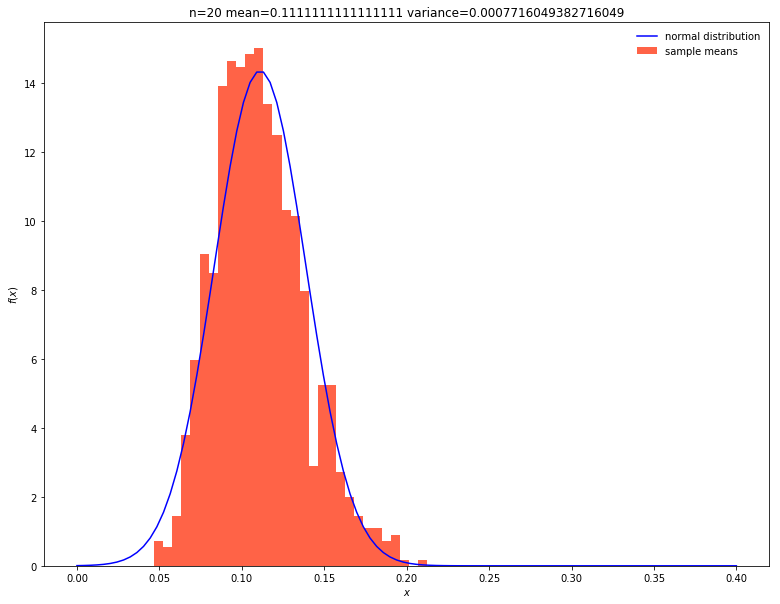

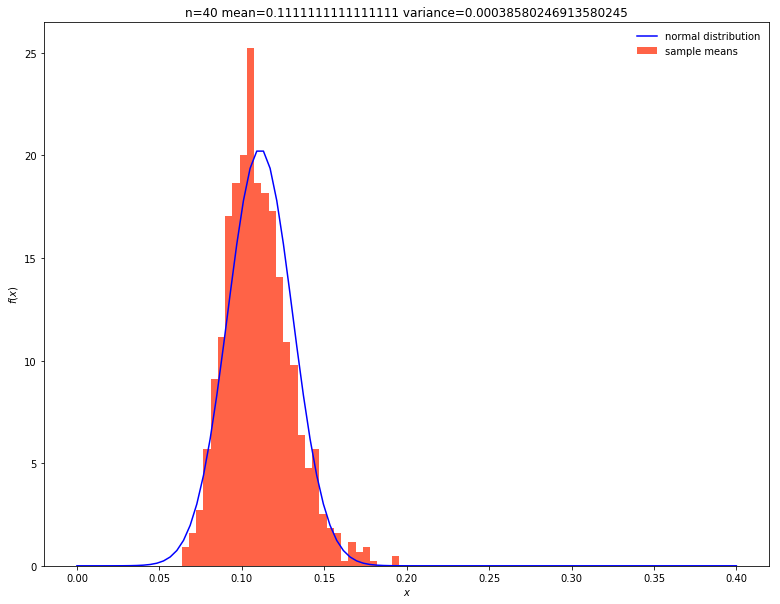

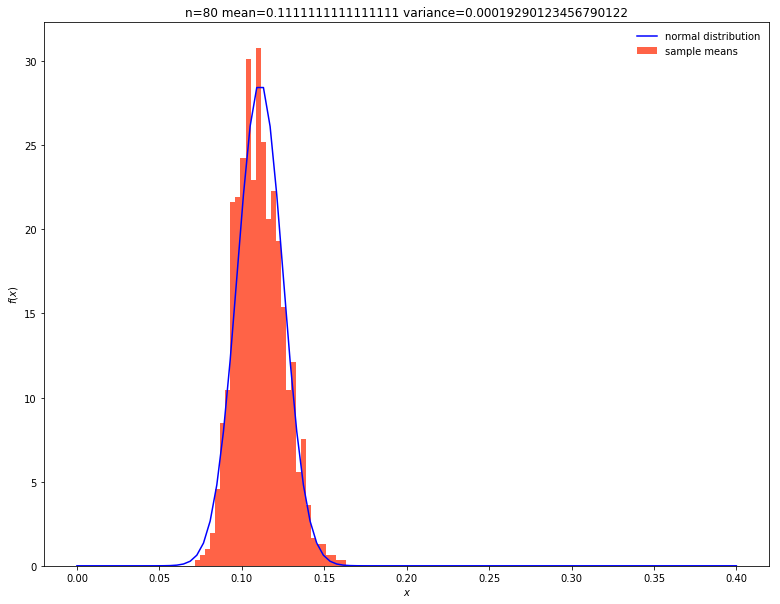

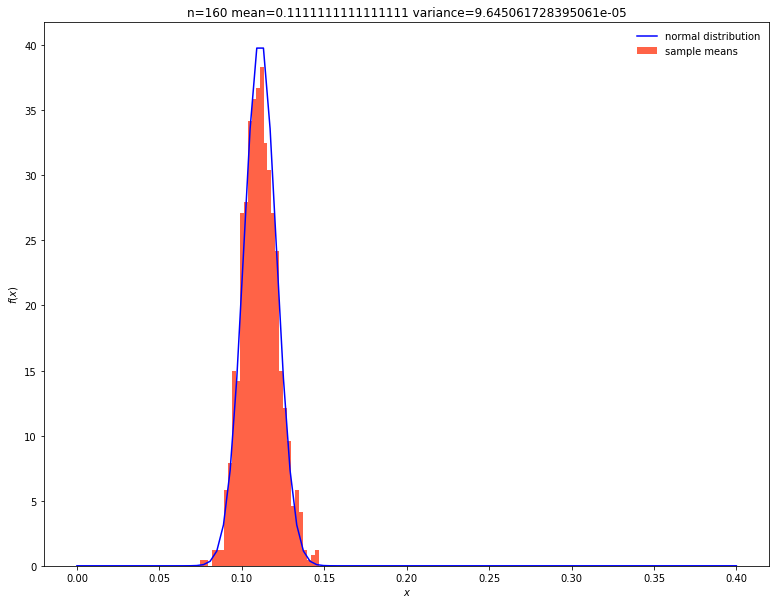

In [12]:
means = []
n = 5

for i in range(6):
    #Сгенерируем по 1000 выборок с размерами n
    for _ in range(1000):
        rvs = lom_rv.rvs(n)
        means.append(rvs.mean())
    #Построим гистограммы их выборочных средних
    plt.figure(figsize=(13, 10))
    plt.hist(means, bins=30, color='tomato', normed=True, label='sample means')
    
    #Построим графики плотности нормальных распределений, которыми приближается распределение выборочных средних
    norm_rv = sts.norm(loc=mean, scale=(var / n)**0.5)
    t = np.linspace(0, 0.4, 100)
    plt.plot(t, norm_rv.pdf(t), color='blue', label='normal distribution')
    
    plt.title('n=' + str(n) + ' mean=' + str(mean) + ' variance=' + str(var/n))
    plt.legend(frameon=False)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    
    n *= 2
    means = []

Вывод: при увеличении значения n (объем выборки) дисперсия нормального распределения, приближающего распределение выборочных средних, уменьшается; соответственно, точность аппроксимации увеличивается. Следовательно, чем больше объем выборки, тем точнее можно оценить ее среднее.